In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

In [13]:
f0_0 = pd.read_csv('data/Ffield/spd_stdt3F0.0pN.csv', names=['spd','std'])
f0_25 = pd.read_csv('data/Ffield/spd_stdt3F0.25pN.csv', names=['spd','std'])
f0_5 = pd.read_csv('data/Ffield/spd_stdt3F0.5pN.csv', names=['spd','std'])
f1_0 = pd.read_csv('data/Ffield/spd_stdt3F1.0pN.csv', names=['spd','std'])
#f1_5 = pd.read_csv('data/Ffield/spd_stdt3F1.5pN.csv', names=['spd','std'])
f_0_25 = pd.read_csv('data/Ffield/spd_stdt3F-0.25pN.csv', names=['spd','std'])
f_0_5 = pd.read_csv('data/Ffield/spd_stdt3F-0.5pN.csv', names=['spd','std'])
f_1_0 = pd.read_csv('data/Ffield/spd_stdt3F-1.0pN.csv', names=['spd','std'])

zalinge = pd.read_csv('data/zalinge.csv')
zalinge_hi = pd.read_csv('data/zalinge-hi.csv')
zalinge_lo = pd.read_csv('data/zalinge-lo.csv')
zalinge_err = zalinge_hi['y'] - zalinge_lo['y']

/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [3]:
spd = np.array([f_1_0['spd'].mean(), f_0_5['spd'].mean(), f_0_25['spd'].mean(), f0_0['spd'].mean(), f0_25['spd'].mean(), f0_5['spd'].mean(), f1_0['spd'].mean()])
std = np.array([f_1_0['std'].mean(), f_0_5['std'].mean(), f_0_25['std'].mean(), f0_0['std'].mean(), f0_25['std'].mean(), f0_5['std'].mean(), f1_0['std'].mean()])
f = np.array([-1.0,-0.5,-0.25,0.0,0.25,0.5,1.0])

In [4]:
f[3:]

array([0.  , 0.25, 0.5 , 1.  ])

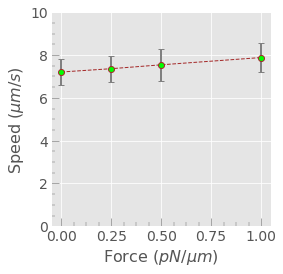

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.errorbar(f[3:], spd[3:], std[3:], ls='--', lw=1, elinewidth=2.0, c='brown', capsize=3, marker='o', markerfacecolor='lime', ecolor='grey')

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('Force ($pN/\mu m$)', fontsize=16)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=16)
ax.set_yticks(np.arange(0,11,2))

#plt.savefig('fig/PullingField.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/PullingField.png', format='png', dpi=300, bbox_inches='tight')
#plt.savefig('fig/PullingField.svg', format='svg', bbox_inches='tight')

plt.show()

In [23]:
import subprocess

subprocess.call('inkscape fig/PullingField.svg -M fig/PullingField.emf',shell=True)

0

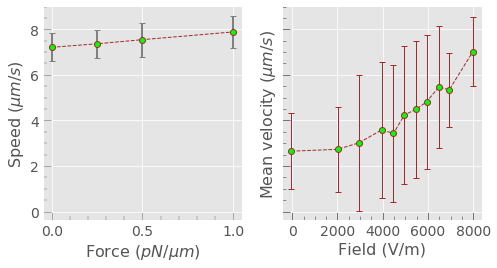

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20*cm,10*cm), sharey=True)

ax[0].errorbar(f[3:], spd[3:], std[3:], ls='--', lw=1, elinewidth=2.0, c='brown', capsize=3, marker='o', markerfacecolor='lime', ecolor='grey')

ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[0].set_xlabel('Force ($pN/\mu m$)', fontsize=16)
ax[0].set_ylabel('Speed ($\mu m/s$)', fontsize=16)
ax[0].set_yticks(np.arange(0,11,2))

ax[1].errorbar(zalinge['x'],zalinge['y'], yerr=zalinge_err-2.7, marker='o', lw=1, ls='--', c='brown', markerfacecolor='lime', capsize=3)

ax[1].set_xlabel('Field (V/m)', fontsize=16)
ax[1].set_ylabel('Mean velocity ($\mu m/s$)', fontsize=16)

ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, which='minor', labelsize=14)

ax[1].set_xticks(np.arange(0,8001,2000))
#ax[1].set_yticks(np.arange(0,11,2))
ax[1].tick_params(direction='in', which='both')

#plt.savefig('fig/simul-zalinge.pdf', format='pdf', bbox_inches='tight')
plt.show()